<a href="https://colab.research.google.com/github/manisha-nair28/Weight-Predictor/blob/main/Weight_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length "{length}" bytes'.format(name=fn, length=len(uploaded[fn])))

Saving height-weight-dataset.csv to height-weight-dataset.csv
User uploaded file "height-weight-dataset.csv" with length "469443" bytes


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#loading the dataset
df=pd.read_csv('height-weight-dataset.csv')
print(df.head())
print(df.tail())

   Height(Inches)  Weight(Pounds)
0        65.78331        112.9925
1        71.51521        136.4873
2        69.39874        153.0269
3        68.21660        142.3354
4        67.78781        144.2971
       Height(Inches)  Weight(Pounds)
24995        69.50215        118.0312
24996        64.54826        120.1932
24997        64.69855        118.2655
24998        67.52918        132.2682
24999        68.87761        124.8742


In [ ]:
#Print the column name of dataset
print(df.columns)
#Total rows and columns in the dataset
print("(Rows, Columns): ",df.shape)
#Check if there is any missing value in the dataset
df.isna().any()


Index(['Height(Inches)', 'Weight(Pounds)'], dtype='object')
(Rows, Columns):  (25000, 2)


Height(Inches)    False
Weight(Pounds)    False
dtype: bool

In [ ]:
#Splitting into independent(x) and dependent(y) variables
#Extracting only the first 500 rows using index values(iloc method)
X= df.iloc[-500:,0].values
Y= df.iloc[-500:,1].values

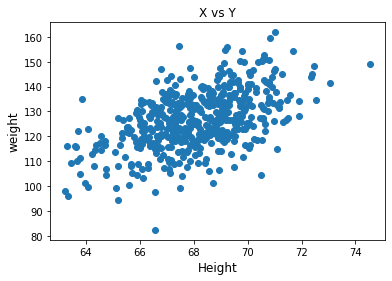

In [ ]:
plt.scatter(X, Y)
plt.title('X vs Y')
plt.xlabel('Height', fontsize=12)
plt.ylabel('weight', fontsize=12)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
#Fitting Simple Linear Regression 
#This is called Model 
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

LinearRegression()

In [ ]:
pred = regressor.predict(X_test.reshape(-1,1))

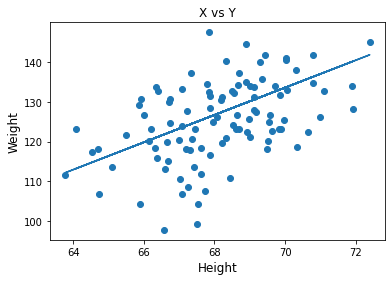

In [ ]:
# Generate a plot like the one in the previous exercise
plt.scatter(X_test, y_test)
plt.plot(X_test, pred)
plt.title('X vs Y')
plt.xlabel('Height', fontsize=12)
plt.ylabel('Weight', fontsize=12)
plt.show()



In [ ]:
print(' y = {0} * x + {1}'.format(regressor.coef_[0], regressor.intercept_))

 y = [3.4382639] * x + [-107.08883278]


In [ ]:
regressor.predict([[200]])

array([[580.56394639]])

In [ ]:
regressor.coef_


array([[3.4382639]])

In [ ]:
regressor.intercept_


array([-107.08883278])

In [ ]:
#find the dependent variable(y) using independent variable(x) 
#using formula: y=mx+c, where m= regressor.coef_ and c= regressor.intercept_
def model(x):
  y= (regressor.coef_)*x + (regressor.intercept_)
  return(y)


#finding y for sample values of x using the above function
t=model(50)
print(t)

[[64.82436202]]


In [ ]:
#Calculate the mean squared error
from sklearn import metrics
metrics.mean_squared_error(y_test,pred)


85.42166212173112